In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
# !wget https://github.com/sobhe/hazm/releases/download/v0.5/resources-standford.zip

In [3]:
# !pip install hazm

In [4]:
# !wget https://github.com/sobhe/hazm/releases/download/v0.5/resources-0.5.zip
# !wget https://github.com/sobhe/hazm/releases/download/v0.5/resources-stanford.zip
# !unzip resources-0.5.zip -d resources
# !unzip resources-stanford.zip -d resources

In [5]:
from hazm import *

In [6]:

normalizer = Normalizer()
# normalizer.normalize('پاصلاح نویسه ها و استفاده از نیم‌فاصله پردازش را آسان می کند ')

In [7]:
tagger = POSTagger(model='resources/postagger.model')
# tagger.tag(word_tokenize('کتاب خواندن واقعا جالب است'))

In [8]:
lemmatizer = Lemmatizer()

In [9]:
parser = DependencyParser(tagger=tagger, lemmatizer=lemmatizer)
# parser.parse(word_tokenize('زنگ‌ها برای که به صدا درمی‌آید؟'))

In [10]:
# !pip install stanza

In [11]:
# import stanza

In [12]:
# stanza.download('fa')

In [13]:
# nlp = stanza.Pipeline('fa',processors='tokenize,pos')
# doc = nlp('سلام خوبی')
# doc

In [14]:
# doc.sentences

# **Import DataSet**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import numpy as np
import re

In [17]:
path_trainset ='/content/drive/MyDrive/ColabNotebooks/trainset.csv'
path_testset = '/content/drive/MyDrive/ColabNotebooks/testset.csv'

In [18]:
trainset = pd.read_csv(path_trainset)
trainset.head()

,Index,Text,Label
0,0,حمید رضا بدیم صفو پایانی ببریم بالا این بچه‌ها...,خوشبین
1,1,طبق شنیده‌ها امروز در حین بازار خبر تولید باال...,خوشبین
2,2,حجم فروش ایران بالاست حقوقیش به زور نگه داشت ا...,بدبین
3,3,اینو از من داشته_باشید امروز نخری جا موندی ناجوور,خوشبین
4,4,وقتی پایانی نزدیک درصد هست یعنی فروش حماقته چو...,خوشبین


In [19]:
testset = pd.read_csv(path_testset)
testset.head()

,Index,Text,Label
0,0,فردا فرو میریزد,بدبین
1,1,از قندیها و غافل نشوید,خوشبین
2,2,به نظرتون باچه قیمتی بازمیشه,خوشبین
3,3,منتظرم باز شه ندبد بفروشم تومن دستمو بیر غنیمت,بدبین
4,4,بازار فقط فرصت ورود داده,خوشبین


In [20]:
trainset.describe()

,Index
count,10000.00000
mean,4999.50000
std,2886.89568
min,0.00000
25%,2499.75000
50%,4999.50000
75%,7499.25000
max,9999.00000


In [21]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Index   10000 non-null  int64 
 1   Text    10000 non-null  object
 2   Label   10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [22]:
trainset.isnull().sum()

Index    0
Text     0
Label    0
dtype: int64

In [23]:
trainset = trainset[['Text','Label']]
trainset

,Text,Label
0,حمید رضا بدیم صفو پایانی ببریم بالا این بچه‌ها...,خوشبین
1,طبق شنیده‌ها امروز در حین بازار خبر تولید باال...,خوشبین
2,حجم فروش ایران بالاست حقوقیش به زور نگه داشت ا...,بدبین
3,اینو از من داشته_باشید امروز نخری جا موندی ناجوور,خوشبین
4,وقتی پایانی نزدیک درصد هست یعنی فروش حماقته چو...,خوشبین
...,...,...
9995,تعدیل مثبت داده_است انشا ا ت روز دیگهمیاد روی ...,خوشبین
9996,گفتم رو منفی میخرم خخ,خوشبین
9997,آخ جون اینم داره ختم به خیر میشه,خوشبین
9998,های_وب ممکنه چند روز منفی بخوره ولی بعدش حرکتش...,خوشبین


In [24]:
testset = testset[['Text','Label']]
testset

,Text,Label
0,فردا فرو میریزد,بدبین
1,از قندیها و غافل نشوید,خوشبین
2,به نظرتون باچه قیمتی بازمیشه,خوشبین
3,منتظرم باز شه ندبد بفروشم تومن دستمو بیر غنیمت,بدبین
4,بازار فقط فرصت ورود داده,خوشبین
...,...,...
1995,امروز رو یادتون باشه همین تاپیکارو اواسط شهریو...,خوشبین
1996,سبد,خوشبین
1997,این سهم رو زیر تومن نمیفروشم,خوشبین
1998,این سهم همچنان در حال جمع شدن میباشد یا حی یا ...,خوشبین


In [25]:
testset['Text']

0                                         فردا فرو میریزد
1                                  از قندیها و غافل نشوید
2                            به نظرتون باچه قیمتی بازمیشه
3          منتظرم باز شه ندبد بفروشم تومن دستمو بیر غنیمت
4                                بازار فقط فرصت ورود داده
                              ...                        
1995    امروز رو یادتون باشه همین تاپیکارو اواسط شهریو...
1996                                                  سبد
1997                         این سهم رو زیر تومن نمیفروشم
1998    این سهم همچنان در حال جمع شدن میباشد یا حی یا ...
1999    عدد صف فروش و تعداد میگه که حقوقی صف رو گذاشته...
Name: Text, Length: 2000, dtype: object

In [26]:
trainset.groupby('Label').count()

,Text
Label,
بدبین,1188
خوشبین,8812


In [27]:
trainset.count()

Text     10000
Label    10000
dtype: int64

In [28]:
trainset.groupby('Text').count()

,Label
Text,
""" « دوستان با این منفی ای که خورد عالی برای اضافه کردن » """,1
' ',1
( ( ) ) رو از دس ندین فکنم افزایش سرمایه ٪ رو همین روز ا تصویب کنن بزنن تو ک دال و سهم قفل شه عرضه‌های حقوقیشم تموم شد از فردا صعود شارپ سهم رو شاهد خواهیم_بود موفق باشید,1
( ( کسی جا نموند کهه ) ) خخ,1
( ) ( ) ( ) ( ) لطفادرموردسبدم راهنماییم کنیدوبگیدکدوماروتاکی نگه دارم وبه چه قیمتی بفروشم ممنون,1
...,...
یکی دیگه از سهم هایی که تارگت‌های فضایی داره الان سهم در مناطق حساسی داره معامله میشه منطقه میتونه جزو آخرین حمایت‌های سهم باشه در تایم هفتگی اگر قیمت‌های - که جزو سنگین‌ترین مفاومت‌های سهم محسوب میشن شکسته بشن میتونیم انتظار رشد تا - رو داشته_باشیم در صورت شکست این قیمت‌ها انتظار رشد فزاینده تا تومن رو میتونیم داشته_باشیم در کل سهم در تایم هفتگی یک موج جدید شروع کرده و تکنیکالیت‌ها دقت داشته باشن این افزایش‌های قیمت رو به منزله موج ندونن,1
یکی فدا کاری کنه بیاد بفروشه,1
یکی قرار بود رنج بزنه چی شد چرا رفتی,1


# **Preprocessing**

In [29]:
labels = trainset['Label'].unique().tolist()
labels

['خوشبین', 'بدبین']

In [30]:
trainset.groupby('Label').count()

,Text
Label,
بدبین,1188
خوشبین,8812


In [31]:
from sklearn import preprocessing
labelPreprocessor = preprocessing.LabelEncoder()
labelPreprocessor.fit(labels)
labelPreprocessor.classes_

array(['بدبین', 'خوشبین'], dtype='<U6')

In [32]:
trainset['Text'] = trainset['Text'].apply(lambda sample: normalizer.normalize(sample))
trainset['Text']

0       حمید رضا بدیم صفو پایانی ببریم بالا این بچه‌ها...
1       طبق شنیده‌ها امروز در حین بازار خبر تولید باال...
2       حجم فروش ایران بالاست حقوقیش به زور نگه داشت ا...
3       اینو از من داشته_باشید امروز نخری جا موندی ناجوور
4       وقتی پایانی نزدیک درصد هست یعنی فروش حماقته چو...
                              ...                        
9995    تعدیل مثبت داده_است انشا ا ت روز دیگهمیاد روی ...
9996                                گفتم رو منفی میخرم خخ
9997                     آخ جون اینم داره ختم به خیر میشه
9998    های_وب ممکنه چند روز منفی بخوره ولی بعدش حرکتش...
9999                تعدیل مثبت بخاطر تعدیل مثبت متوقف شده
Name: Text, Length: 10000, dtype: object

In [33]:
trainset['Text'] = trainset['Text'].apply(lambda sample: re.sub(r"[-()\#/@<>{}`+=_^*%|]+","",sample))
trainset['Text']

0       حمید رضا بدیم صفو پایانی ببریم بالا این بچه‌ها...
1       طبق شنیده‌ها امروز در حین بازار خبر تولید باال...
2       حجم فروش ایران بالاست حقوقیش به زور نگه داشت ا...
3        اینو از من داشتهباشید امروز نخری جا موندی ناجوور
4       وقتی پایانی نزدیک درصد هست یعنی فروش حماقته چو...
                              ...                        
9995    تعدیل مثبت دادهاست انشا ا ت روز دیگهمیاد روی ک...
9996                                گفتم رو منفی میخرم خخ
9997                     آخ جون اینم داره ختم به خیر میشه
9998    هایوب ممکنه چند روز منفی بخوره ولی بعدش حرکتش ...
9999                تعدیل مثبت بخاطر تعدیل مثبت متوقف شده
Name: Text, Length: 10000, dtype: object

In [34]:
EMOJI_PATTERN = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+"
    ,flags=re.UNICODE
)

In [35]:
trainset['Text'] = trainset['Text'].apply(lambda sample: EMOJI_PATTERN.sub(r'',sample))
trainset['Text']

0       حمید رضا بدیم صفو پایانی ببریم بالا این بچه‌ها...
1       طبق شنیده‌ها امروز در حین بازار خبر تولید باال...
2       حجم فروش ایران بالاست حقوقیش به زور نگه داشت ا...
3        اینو از من داشتهباشید امروز نخری جا موندی ناجوور
4       وقتی پایانی نزدیک درصد هست یعنی فروش حماقته چو...
                              ...                        
9995    تعدیل مثبت دادهاست انشا ا ت روز دیگهمیاد روی ک...
9996                                گفتم رو منفی میخرم خخ
9997                     آخ جون اینم داره ختم به خیر میشه
9998    هایوب ممکنه چند روز منفی بخوره ولی بعدش حرکتش ...
9999                تعدیل مثبت بخاطر تعدیل مثبت متوقف شده
Name: Text, Length: 10000, dtype: object

In [36]:
trainset['Text'] = trainset['Text'].apply(lambda sample:[word[0]
                                          for word in tagger.tag(word_tokenize(sample))
                                          if word[1] not in {'PUNC':"",'POSTP':"",'INT':"",'V':""}])

In [37]:
trainset

,Text,Label
0,"[حمید, رضا, صفو, پایانی, بالا, این, بچه‌ها, حا...",خوشبین
1,"[طبق, شنیده‌ها, امروز, در, حین, بازار, خبر, تو...",خوشبین
2,"[حجم, فروش, ایران, حقوقیش, به, زور, نگه, از, ط...",بدبین
3,"[اینو, از, من, امروز, نخری, جا, موندی, ناجوور]",خوشبین
4,"[وقتی, پایانی, نزدیک, درصد, یعنی, فروش, چون, ف...",خوشبین
...,...,...
9995,"[تعدیل, مثبت, دادهاست, انشا, ا, ت, روز, دیگهمی...",خوشبین
9996,"[منفی, خخ]",خوشبین
9997,"[آخ, جون, اینم, ختم, به, خیر]",خوشبین
9998,"[هایوب, چند, روز, منفی, ولی, بعدش, حرکتش, شروع...",خوشبین


In [38]:
testset['Text']

0                                         فردا فرو میریزد
1                                  از قندیها و غافل نشوید
2                            به نظرتون باچه قیمتی بازمیشه
3          منتظرم باز شه ندبد بفروشم تومن دستمو بیر غنیمت
4                                بازار فقط فرصت ورود داده
                              ...                        
1995    امروز رو یادتون باشه همین تاپیکارو اواسط شهریو...
1996                                                  سبد
1997                         این سهم رو زیر تومن نمیفروشم
1998    این سهم همچنان در حال جمع شدن میباشد یا حی یا ...
1999    عدد صف فروش و تعداد میگه که حقوقی صف رو گذاشته...
Name: Text, Length: 2000, dtype: object

In [39]:
stopwords= stopwords_list()
stopwords

['و',
 'در',
 'به',
 'از',
 'که',
 'این',
 'را',
 'با',
 'است',
 'برای',
 'آن',
 'یک',
 'خود',
 'تا',
 'کرد',
 'بر',
 'هم',
 'نیز',
 'گفت',
 'می\u200cشود',
 'وی',
 'شد',
 'دارد',
 'ما',
 'اما',
 'یا',
 'شده',
 'باید',
 'هر',
 'آنها',
 'بود',
 'او',
 'دیگر',
 'دو',
 'مورد',
 'می\u200cکند',
 'شود',
 'کند',
 'وجود',
 'بین',
 'پیش',
 'شده_است',
 'پس',
 'نظر',
 'اگر',
 'همه',
 'یکی',
 'حال',
 'هستند',
 'من',
 'کنند',
 'نیست',
 'باشد',
 'چه',
 'بی',
 'می',
 'بخش',
 'می\u200cکنند',
 'همین',
 'افزود',
 'هایی',
 'دارند',
 'راه',
 'همچنین',
 'روی',
 'داد',
 'بیشتر',
 'بسیار',
 'سه',
 'داشت',
 'چند',
 'سوی',
 'تنها',
 'هیچ',
 'میان',
 'اینکه',
 'شدن',
 'بعد',
 'جدید',
 'ولی',
 'حتی',
 'کردن',
 'برخی',
 'کردند',
 'می\u200cدهد',
 'اول',
 'نه',
 'کرده_است',
 'نسبت',
 'بیش',
 'شما',
 'چنین',
 'طور',
 'افراد',
 'تمام',
 'درباره',
 'بار',
 'بسیاری',
 'می\u200cتواند',
 'کرده',
 'چون',
 'ندارد',
 'دوم',
 'بزرگ',
 'طی',
 'حدود',
 'همان',
 'بدون',
 'البته',
 'آنان',
 'می\u200cگوید',
 'دیگری',
 'خواهد_شد',


In [40]:
trainset['Text'] = trainset['Text'].apply(lambda sample:[word for word in sample
                                          if word not in stopwords and
                                          not word.isdigit() and
                                          len(word)>1])
trainset

,Text,Label
0,"[حمید, رضا, صفو, پایانی, بچه‌ها, حالشو]",خوشبین
1,"[شنیده‌ها, امروز, حین, بازار, خبر, تولید, باال...",خوشبین
2,"[حجم, فروش, ایران, حقوقیش, زور, نگه, طرفی, حق,...",بدبین
3,"[اینو, امروز, نخری, موندی, ناجوور]",خوشبین
4,"[پایانی, درصد, فروش, فردا, صد, صد]",خوشبین
...,...,...
9995,"[تعدیل, مثبت, دادهاست, انشا, روز, دیگهمیاد, کد...",خوشبین
9996,"[منفی, خخ]",خوشبین
9997,"[آخ, جون, اینم, ختم, خیر]",خوشبین
9998,"[هایوب, روز, منفی, بعدش, حرکتش, وجبران]",خوشبین


In [41]:
trainset['Text'].tolist()[:100]

[['حمید', 'رضا', 'صفو', 'پایانی', 'بچه\u200cها', 'حالشو'],
 ['شنیده\u200cها',
  'امروز',
  'حین',
  'بازار',
  'خبر',
  'تولید',
  'باالی',
  'دستگاه',
  'ایران',
  'منتشر',
  'گزارش',
  'بینی',
  'سود',
  'فشارهایی',
  'اعالم',
  'تعدیل',
  'منفی',
  'درصدی',
  'سود',
  'مجدد',
  'تعدیل'],
 ['حجم',
  'فروش',
  'ایران',
  'حقوقیش',
  'زور',
  'نگه',
  'طرفی',
  'حق',
  'تقدم',
  'باد',
  'عجله\u200cای',
  'خرید'],
 ['اینو', 'امروز', 'نخری', 'موندی', 'ناجوور'],
 ['پایانی', 'درصد', 'فروش', 'فردا', 'صد', 'صد'],
 ['سبد'],
 ['تایید',
  'معنای',
  'نقل',
  'انتقال',
  'ارزی',
  'دلار',
  'ادعای',
  'فروش',
  'انتقال',
  'ارزی',
  'آگاه',
  'شرایط',
  'سال',
  'نقل',
  'انتقال',
  'ارزی',
  'مقدور',
  'فروششون',
  'افزایش',
  'برابری',
  'نرخ',
  'ارز',
  'ماه',
  'سود',
  'بینی',
  'بودجه',
  'رکورد',
  'زدن',
  'ماهه',
  'بعدی',
  'چی',
  'مازاد',
  'بینی',
  'ضمنا',
  'نرخی',
  'بنزین',
  'ماهه',
  'قطعی'],
 ['منفی', 'فردا', 'خخ'],
 ['سلام',
  'صبح',
  'همگی',
  'بخیر',
  'دلم',
  'برات',


In [42]:
trainset = trainset[trainset.Text.str.len()>0]
trainset

,Text,Label
0,"[حمید, رضا, صفو, پایانی, بچه‌ها, حالشو]",خوشبین
1,"[شنیده‌ها, امروز, حین, بازار, خبر, تولید, باال...",خوشبین
2,"[حجم, فروش, ایران, حقوقیش, زور, نگه, طرفی, حق,...",بدبین
3,"[اینو, امروز, نخری, موندی, ناجوور]",خوشبین
4,"[پایانی, درصد, فروش, فردا, صد, صد]",خوشبین
...,...,...
9995,"[تعدیل, مثبت, دادهاست, انشا, روز, دیگهمیاد, کد...",خوشبین
9996,"[منفی, خخ]",خوشبین
9997,"[آخ, جون, اینم, ختم, خیر]",خوشبین
9998,"[هایوب, روز, منفی, بعدش, حرکتش, وجبران]",خوشبین


In [43]:
trainset_data = trainset['Text'].values.tolist()
trainset_label = trainset['Label'].values.tolist()

In [44]:
print(trainset_data[:2])

[['حمید', 'رضا', 'صفو', 'پایانی', 'بچه\u200cها', 'حالشو'], ['شنیده\u200cها', 'امروز', 'حین', 'بازار', 'خبر', 'تولید', 'باالی', 'دستگاه', 'ایران', 'منتشر', 'گزارش', 'بینی', 'سود', 'فشارهایی', 'اعالم', 'تعدیل', 'منفی', 'درصدی', 'سود', 'مجدد', 'تعدیل']]


In [45]:
print(trainset_label[:2])

['خوشبین', 'خوشبین']


In [46]:
train_data = [" ".join(word for word in text).strip() for text in trainset_data]
train_label = labelPreprocessor.transform(trainset_label)
print(train_data[:2])
print(train_label[:2])

['حمید رضا صفو پایانی بچه\u200cها حالشو', 'شنیده\u200cها امروز حین بازار خبر تولید باالی دستگاه ایران منتشر گزارش بینی سود فشارهایی اعالم تعدیل منفی درصدی سود مجدد تعدیل']
[1 1]


In [47]:
from sklearn.model_selection import train_test_split
train_data, valid_data, train_label, valid_label = train_test_split(train_data,train_label,test_size=0.1,random_state=42)
print(f'''
train_data: {train_data} 
valid_data: {valid_data}
train_label: {train_label}
valid_label: {valid_label}
''')


train_data: ['آماده صف خرید دوستان بررسی', 'سلام هفته', 'امروز صورت عبور مقاومت هفته بالای تثبیت اواخر هفته مقاومت روانی عبور خواهدنمود', 'جون رفتن فعلا', 'شفاف خبری فراتر پاسخگویی بع اقتصاد آنلاین', 'سودشو تقسیم حماقت محض قیمت بفروشیدش ارزش حرفاس اگه عملکردش راحت تومن سود توجه سود انباشتش', 'شب بخیر سیگنال خرید شنبه شهریور ریسک سهام نام اوج گرفتن سرمای هوا نگهداری مگه تعدیل اساسی مثبت روبرو اون صورت خارج نوسان سراغ یادتون پیشبینی\u200cها اساس قوانین احتماله علم غیب استفاده', 'اون مزاحمی کامنتهای اعصاب کن سهامداران حرفه\u200cای گمراه مبتدیان بورسی روزهای ضررهای روحی مادی دوستان محترم حاضر تالار لطفا گزارش\u200cهای خودمون ناظر سایت ورود نخاله\u200cای جلوگیری تبادل افکار روزهای پرسود', 'کجان اونایی بدبین میزدین صف مبارک همتون', 'بسوی هدف', 'بالاخره آقا خواب خرگوشی بیدار دست سنگین تعدیل مثبت ماه استراحت الان دیگه وقت کار وکاسبیش', 'الان چبرا شده\u200c', 'دیگه فروشنده اصلا مراقب سهمتون', 'احتمال صعود فردا', 'اخبار واصله بازار نگرانی کاهش قیمت اوره سطح کمتر دلار کاهش نرخ خوراک مهمترین دلای

In [48]:
print(len(train_data))
print(len(valid_data))

8839
983


In [49]:
train_data[:10]

['آماده صف خرید دوستان بررسی',
 'سلام هفته',
 'امروز صورت عبور مقاومت هفته بالای تثبیت اواخر هفته مقاومت روانی عبور خواهدنمود',
 'جون رفتن فعلا',
 'شفاف خبری فراتر پاسخگویی بع اقتصاد آنلاین',
 'سودشو تقسیم حماقت محض قیمت بفروشیدش ارزش حرفاس اگه عملکردش راحت تومن سود توجه سود انباشتش',
 'شب بخیر سیگنال خرید شنبه شهریور ریسک سهام نام اوج گرفتن سرمای هوا نگهداری مگه تعدیل اساسی مثبت روبرو اون صورت خارج نوسان سراغ یادتون پیشبینی\u200cها اساس قوانین احتماله علم غیب استفاده',
 'اون مزاحمی کامنتهای اعصاب کن سهامداران حرفه\u200cای گمراه مبتدیان بورسی روزهای ضررهای روحی مادی دوستان محترم حاضر تالار لطفا گزارش\u200cهای خودمون ناظر سایت ورود نخاله\u200cای جلوگیری تبادل افکار روزهای پرسود',
 'کجان اونایی بدبین میزدین صف مبارک همتون',
 'بسوی هدف']

In [50]:
from collections import Counter
all_words = [word for text in train_data for word in word_tokenize(text)]
word_cnt = Counter(all_words)
word_cnt.most_common

<bound method Counter.most_common of Counter({'خرید': 1484, 'صف': 1081, 'قیمت': 874, 'امروز': 866, 'حقوقی': 726, 'سود': 705, 'دوستان': 703, 'بازار': 694, 'فروش': 619, 'فردا': 604, 'افزایش': 573, 'شرکت': 561, 'مثبت': 545, 'یه': 540, 'روز': 510, 'سرمایه': 509, 'دیگه': 477, 'منفی': 455, 'سهام': 432, 'تومان': 414, 'درصد': 412, 'خبر': 405, 'سال': 380, 'تومن': 366, 'حمایت': 355, 'شاخص': 352, 'اگه': 330, 'الان': 325, 'ایران': 312, 'تعدیل': 303, 'دست': 260, 'بالای': 253, 'میلیون': 240, 'توجه': 236, 'ریال': 236, 'گروه': 233, 'ماه': 232, 'فرصت': 227, 'خدا': 225, 'شنبه': 224, 'سیگنال': 221, 'هدف': 220, 'حجم': 220, 'مجمع': 219, 'هفته': 209, 'پایین': 208, 'گزارش': 205, 'عرضه': 205, 'اون': 191, 'مقاومت': 189, 'کف': 188, 'فروشنده': 186, 'ضرر': 183, 'سلام': 180, 'صعودی': 180, 'تحلیل': 178, 'نفت': 178, 'نوسان': 177, 'سهامداران': 176, 'چی': 171, 'تولید': 171, 'صعود': 170, 'قرار': 170, 'درصدی': 168, 'وقت': 166, 'احتمال': 162, 'اعلام': 162, 'معامله': 160, 'صورت': 155, 'صبر': 152, 'معاملات': 149, 'میکنه': 

In [51]:
len(word_cnt)

13899

In [52]:
from hazm import POSTagger
taggger = POSTagger(model='resources/postagger.model')
all_pos = [pos[1] for text in train_data for pos in tagger.tag(word_tokenize(text))]
all_pos[:2]

['AJe', 'Ne']

In [53]:
pos_cnt = Counter(all_pos)
pos_cnt.most_common

<bound method Counter.most_common of Counter({'Ne': 36886, 'N': 23015, 'AJe': 7217, 'AJ': 6241, 'ADV': 5371, 'V': 1627, 'NUM': 1468, 'PRO': 1042, 'Pe': 990, 'P': 812, 'CONJ': 654, 'RES': 503, 'DET': 483, 'CL': 141, 'NUMe': 124, 'DETe': 86, 'RESe': 36, 'ADVe': 32, 'INT': 21, 'CONJe': 7, 'PROe': 5, 'POSTP': 1, 'PUNC': 1})>

In [54]:
train_data[:10]

['آماده صف خرید دوستان بررسی',
 'سلام هفته',
 'امروز صورت عبور مقاومت هفته بالای تثبیت اواخر هفته مقاومت روانی عبور خواهدنمود',
 'جون رفتن فعلا',
 'شفاف خبری فراتر پاسخگویی بع اقتصاد آنلاین',
 'سودشو تقسیم حماقت محض قیمت بفروشیدش ارزش حرفاس اگه عملکردش راحت تومن سود توجه سود انباشتش',
 'شب بخیر سیگنال خرید شنبه شهریور ریسک سهام نام اوج گرفتن سرمای هوا نگهداری مگه تعدیل اساسی مثبت روبرو اون صورت خارج نوسان سراغ یادتون پیشبینی\u200cها اساس قوانین احتماله علم غیب استفاده',
 'اون مزاحمی کامنتهای اعصاب کن سهامداران حرفه\u200cای گمراه مبتدیان بورسی روزهای ضررهای روحی مادی دوستان محترم حاضر تالار لطفا گزارش\u200cهای خودمون ناظر سایت ورود نخاله\u200cای جلوگیری تبادل افکار روزهای پرسود',
 'کجان اونایی بدبین میزدین صف مبارک همتون',
 'بسوی هدف']

# **Feature Extracton**

In [55]:
testset['Text'] = testset['Text'].apply(lambda sample: normalizer.normalize(sample))

In [56]:
testset['Text'] = testset['Text'].apply(lambda sample: re.sub(r"[-()/`%=+_{}|\<>$#@^&*]~","",sample))
testset['Text'] = testset['Text'].apply(lambda sample: EMOJI_PATTERN.sub(r'',sample))
testset['Text'] = testset['Text'].apply(lambda sample:[word[0]
                                          for word in tagger.tag(word_tokenize(sample))
                                          if word[1] not in {'PUNC':"",'POSTP':"",'INT':"",'V':""}])
testset['Text'] = testset['Text'].apply(lambda sample:[word for word in sample
                                          if word not in stopwords and
                                          not word.isdigit() and
                                          len(word)>1])
testset = testset[testset.Text.str.len()>0]

In [57]:
testset_data = testset['Text'].values.tolist()
testset_label = testset['Label'].values.tolist()

In [58]:
test_data = [" ".join(word for word in text).strip() for text in testset_data]

In [59]:
test_label = labelPreprocessor.transform(testset_label)

In [60]:
print(test_data[:2])
print(test_label[:2])

['فردا فرو', 'قندیها غافل']
[0 1]


In [61]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(min_df=4,max_df=10,ngram_range=(1,4),tokenizer=word_tokenize,analyzer='word')
# vectorizer.fit(train_data)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf_idf = TfidfVectorizer(min_df = 4, max_df = 10, ngram_range = (1, 4), tokenizer = word_tokenize, analyzer = 'word',use_idf = True)
vectorizer_tf_idf.fit(train_data)

TfidfVectorizer(max_df=10, min_df=4, ngram_range=(1, 4),
                tokenizer=<function word_tokenize at 0x7fa4aec37c20>)

In [62]:
len(vectorizer_tf_idf.vocabulary_)

2822

In [63]:
vectorizer_tf_idf.idf_

array([7.88981758, 8.47760424, 8.29528269, ..., 8.47760424, 8.29528269,
       8.47760424])

In [64]:
len(vectorizer_tf_idf.get_feature_names())

2822

In [65]:
vectorizer_tf_idf.stop_words_

{'تصریح ایجاد هماهنگی',
 'اصطلاح بارزدن اتفاق اصلا',
 'حسابرس بالای',
 'فروشتونو قیمت',
 'همینه قرارداد نهایی',
 'تحلیل\u200cها شرکتملی مس',
 'هیجان مفت بخرن',
 'اگه آخر عاقبت چی',
 'سایپا مطمین خبرهاییه الان',
 'بدنه صعودی سفید',
 'عالمه اخبار',
 'بهش یدفعه',
 'سهام غذایی رفتن مجمع',
 'حقوقی فروختن',
 'سهاماتون باشین سهامدارا',
 'پژو منجر بهبود',
 'گمانم پایین',
 'گروه اعم صادرات',
 'خلوص صادراتی تولید',
 'بخاطرمصرف',
 'ایران نشانه',
 'نبایدخریداری صورتی',
 'پروا',
 'فروشنده انشالله',
 'تن کیه',
 'حق تومنی فروختن رویایی',
 'بازار عده',
 'هفته صعودی',
 'پالمی',
 'اعلام اتمام اصلاح',
 'شنبه توصیه',
 'فروشنده\u200cها اونایی صبور',
 'بد هرچند',
 'صفش همراهی سهامداران',
 'سود عملیاتیش کاهش',
 'قل بازی',
 'بقیه',
 'حجمش میلیون دیگه',
 'دیگه موندن چیکار',
 'سال اطلاعاتی فعالیت',
 'نقد امروز',
 'عرضه چشم',
 'میتونه بدترین شرایط ادامه',
 'تشکیلاتی کاترین',
 'نگاه قیمت سال کجا',
 'بلوکی روز گذشته وخرید',
 'اعمال فرمول سال خوداری',
 'صف خرید دقیقا خاطر',
 'نمیریزه اونشم',
 'خبر الان دوستان',
 'ک

In [66]:
[x for x in vectorizer_tf_idf.get_feature_names()] [:10]

['آبان',
 'آبان ماه',
 'آبی',
 'آتش',
 'آتیش',
 'آتیه',
 'آخ',
 'آخ جون',
 'آخر وقت صف',
 'آخرش']

In [67]:
# train_data = [" ".join(word for word in text).strip() for text in train_data]
# valid_data = [" ".join(word for word in text).strip() for text in valid_data]

In [68]:
# testset['Text']

In [69]:
# train_data[:2]

In [70]:
# vectorizer.fit(train_data)

In [71]:
# len(vectorizer.get_feature_names())

In [72]:
# vectorizer.get_feature_names()[:10]

In [73]:
# train_data_vectorized = vectorizer.transform(train_data)
# valid_data_vectorized = vectorizer.transform(valid_data)
train_data_vectorized = vectorizer_tf_idf.transform(train_data)
valid_data_vectorized = vectorizer_tf_idf.transform(valid_data)
test_data_vectorized = vectorizer_tf_idf.transform(test_data)
df1 = pd.DataFrame(train_data_vectorized.toarray(), columns = vectorizer_tf_idf.get_feature_names())
df2 = pd.DataFrame(valid_data_vectorized.toarray(), columns = vectorizer_tf_idf.get_feature_names())
df3 = pd.DataFrame(test_data_vectorized.toarray(), columns = vectorizer_tf_idf.get_feature_names())

In [74]:
train_data_vectorized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
testset['Text']

0                                             [فردا, فرو]
1                                          [قندیها, غافل]
2                                   [نظرتون, باچه, قیمتی]
3                           [شه, تومن, دستمو, بیر, غنیمت]
4                                     [بازار, فرصت, ورود]
                              ...                        
1995    [امروز, یادتون, تاپیکارو, اواسط, شهریور, صف, م...
1996                                                [سبد]
1997                                               [تومن]
1998                                           [حی, قیوم]
1999     [عدد, صف, فروش, حقوقی, صف, ساعت, ده, میبلعه, صف]
Name: Text, Length: 1968, dtype: object

In [76]:
valid_data_vectorized.toarray()[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
train_label[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [78]:
valid_label[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [79]:
# train_label=labelPreprocessor.transform(train_label)
# valid_label=labelPreprocessor.transform(valid_label)

In [80]:
# train_label[:10]

In [81]:
# valid_label[:10]

# **Modeling**

In [82]:
from sklearn.naive_bayes import MultinomialNB

modelNB = MultinomialNB()
modelNB.fit(train_data_vectorized.toarray(),train_label)

MultinomialNB()

In [83]:
predictionNB = modelNB.predict(valid_data_vectorized.toarray())
predictionNB

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [84]:
valid_label

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [85]:
from sklearn.metrics import accuracy_score

print(f'Accuracy:{accuracy_score(valid_label,predictionNB)}')

Accuracy:0.8758901322482198


In [86]:
from sklearn.metrics  import confusion_matrix

In [87]:
conf = confusion_matrix(valid_label,predictionNB)
conf

array([[  1, 120],
       [  2, 860]])

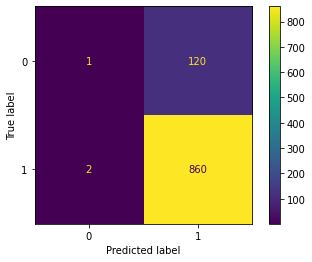

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(modelNB,valid_data_vectorized,valid_label)
plt.gcf().axes[0].tick_params(colors='Black')
plt.gcf().axes[1].tick_params(colors='Black')
plt.show()

In [89]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(valid_label,predictionNB))

print(f1_score(valid_label,predictionNB))
print(f1_score(valid_label,predictionNB,average='macro'))

              precision    recall  f1-score   support

           0       0.33      0.01      0.02       121
           1       0.88      1.00      0.93       862

    accuracy                           0.88       983
   macro avg       0.61      0.50      0.47       983
weighted avg       0.81      0.88      0.82       983

0.9337676438653636
0.47494833806171405


In [90]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=10,random_state=0,
                               class_weight='balanced')

modelRF.fit(train_data_vectorized.toarray(),train_label)

RandomForestClassifier(class_weight='balanced', n_estimators=10, random_state=0)

In [91]:
predictionRF = modelRF.predict(valid_data_vectorized.toarray())

In [92]:
predictionRF

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

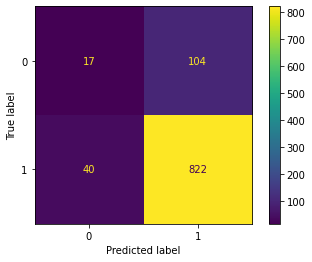

              precision    recall  f1-score   support

           0       0.30      0.14      0.19       121
           1       0.89      0.95      0.92       862

    accuracy                           0.85       983
   macro avg       0.59      0.55      0.56       983
weighted avg       0.82      0.85      0.83       983

0.919463087248322
0.5552371616016891


In [93]:
conf = confusion_matrix(valid_label,predictionRF)
matrix = plot_confusion_matrix(modelRF,valid_data_vectorized,valid_label)
plt.gcf().axes[0].tick_params(colors='Black')
plt.gcf().axes[1].tick_params(colors='Black')
plt.show()

print(classification_report(valid_label,predictionRF))

print(f1_score(valid_label,predictionRF))
print(f1_score(valid_label,predictionRF,average='macro'))

In [94]:
# test_pred = model.predict(test_data_vectorized.toarray())

In [95]:
# test_pred

In [96]:
# conf = confusion_matrix(test_label,test_pred)
# matrix = plot_confusion_matrix(model,test_data_vectorized,test_label)
# plt.gcf().axes[0].tick_params(colors='Black')
# plt.gcf().axes[1].tick_params(colors='Black')
# plt.show()

# print(classification_report(test_label,test_pred))

# print(f1_score(test_label,test_pred))
# print(f1_score(test_label,test_pred,average='macro'))

In [97]:
from sklearn.svm import SVC

modelSVM = SVC(class_weight='balanced')

modelSVM.fit(train_data_vectorized.toarray(),train_label)


SVC(class_weight='balanced')

In [98]:
predictionSVM = modelSVM.predict(valid_data_vectorized.toarray())

In [99]:
predictionSVM

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [100]:
conf = confusion_matrix(valid_label,predictionSVM)

print(classification_report(valid_label,predictionSVM))

print(f1_score(valid_label,predictionSVM))
print(f1_score(valid_label,predictionSVM,average='macro'))

              precision    recall  f1-score   support

           0       0.32      0.12      0.17       121
           1       0.89      0.97      0.92       862

    accuracy                           0.86       983
   macro avg       0.60      0.54      0.55       983
weighted avg       0.82      0.86      0.83       983

0.9239311493614658
0.5468140595292177


In [101]:
conf
print(f'Accuracy {accuracy_score(valid_label,predictionSVM)}')

Accuracy 0.8606307222787386


In [103]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(class_weight='balanced')

modelLR.fit(train_data_vectorized.toarray(),train_label)

LogisticRegression(class_weight='balanced')

In [104]:
predictionLR = modelLR.predict(valid_data_vectorized.toarray())

In [105]:
predictionLR

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [106]:
conf = confusion_matrix(valid_label,predictionLR)

print(classification_report(valid_label,predictionLR))

print(f1_score(valid_label,predictionLR))
print(f1_score(valid_label,predictionLR,average='macro'))

              precision    recall  f1-score   support

           0       0.25      0.30      0.27       121
           1       0.90      0.87      0.89       862

    accuracy                           0.80       983
   macro avg       0.57      0.59      0.58       983
weighted avg       0.82      0.80      0.81       983

0.8858823529411765
0.5782795223352499


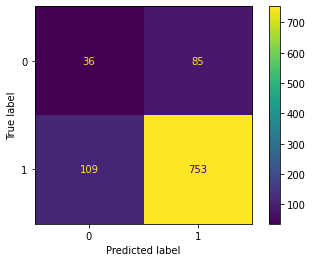

In [107]:
conf = confusion_matrix(valid_label,predictionLR)

matrix = plot_confusion_matrix(modelLR,valid_data_vectorized,valid_label)
plt.gcf().axes[0].tick_params(colors='Black')
plt.gcf().axes[1].tick_params(colors='Black')
plt.show()

In [108]:
test_pred = modelLR.predict(test_data_vectorized.toarray())
test_pred

array([1, 1, 1, ..., 1, 1, 0])

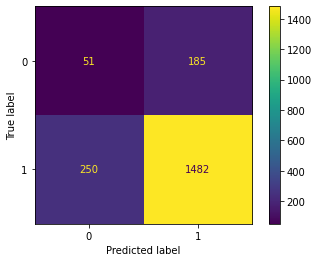

              precision    recall  f1-score   support

           0       0.17      0.22      0.19       236
           1       0.89      0.86      0.87      1732

    accuracy                           0.78      1968
   macro avg       0.53      0.54      0.53      1968
weighted avg       0.80      0.78      0.79      1968

0.8720211827007943
0.5309826583895033


In [109]:
conf = confusion_matrix(test_label,test_pred)
matrix = plot_confusion_matrix(modelLR,test_data_vectorized,test_label)
plt.gcf().axes[0].tick_params(colors='Black')
plt.gcf().axes[1].tick_params(colors='Black')
plt.show()

print(classification_report(test_label,test_pred))

print(f1_score(test_label,test_pred))
print(f1_score(test_label,test_pred,average='macro'))

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

modelGB = GradientBoostingClassifier(n_estimators =100, learning_rate=0.1, max_depth=4, random_state=0)

modelGB.fit(train_data_vectorized.toarray(),train_label)

GradientBoostingClassifier(max_depth=4, random_state=0)

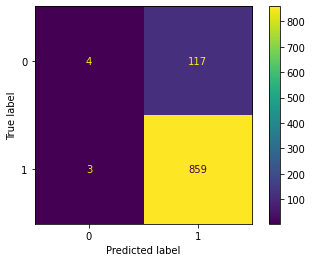

              precision    recall  f1-score   support

           0       0.57      0.03      0.06       121
           1       0.88      1.00      0.93       862

    accuracy                           0.88       983
   macro avg       0.73      0.51      0.50       983
weighted avg       0.84      0.88      0.83       983

0.9347116430903156
0.4986058215451578


In [111]:
predictionGB = modelGB.predict(valid_data_vectorized.toarray())
conf = confusion_matrix(valid_label,predictionGB)

matrix = plot_confusion_matrix(modelGB,valid_data_vectorized,valid_label)
plt.gcf().axes[0].tick_params(colors='Black')
plt.gcf().axes[1].tick_params(colors='Black')
plt.show()

print(classification_report(valid_label,predictionGB))

print(f1_score(valid_label,predictionGB))
print(f1_score(valid_label,predictionGB,average='macro'))